In [1]:
import warnings
warnings.filterwarnings("ignore")

from jqdatasdk import *
auth('18810883096', 'Ww19930921')
# 查询是否连接成功
is_auth = is_auth()

提示：当前环境pandas版本为0.25，get_price与get_fundamentals_continuously接口panel参数将固定为False
注意：0.25以上版本pandas不支持panel，如使用该数据结构和相关函数请注意修改
auth success 


In [2]:
#兖洲煤业 600188
get_industry("601600.XSHG", date=None)

{'601600.XSHG': {'sw_l1': {'industry_code': '801050',
   'industry_name': '有色金属I'},
  'sw_l2': {'industry_code': '801055', 'industry_name': '工业金属II'},
  'sw_l3': {'industry_code': '850551', 'industry_name': '铝III'},
  'zjw': {'industry_code': 'C32', 'industry_name': '有色金属冶炼和压延加工业'},
  'jq_l2': {'industry_code': 'HY413', 'industry_name': '铝指数'},
  'jq_l1': {'industry_code': 'HY002', 'industry_name': '材料指数'}}}

In [3]:
# 铝行业的成分股
sw_id='850551'
stocks = get_industry_stocks(sw_id)
print(stocks)

['000612.XSHE', '000807.XSHE', '000933.XSHE', '002160.XSHE', '002379.XSHE', '002501.XSHE', '002540.XSHE', '002578.XSHE', '002806.XSHE', '002824.XSHE', '002988.XSHE', '002996.XSHE', '300328.XSHE', '300337.XSHE', '300828.XSHE', '600219.XSHG', '600595.XSHG', '600768.XSHG', '600888.XSHG', '601388.XSHG', '601600.XSHG', '601677.XSHG', '601702.XSHG', '603115.XSHG', '603876.XSHG']


In [4]:
stock_name={}
for stock in stocks:
    stock_name[stock]=get_security_info(stock).display_name

In [5]:
# 获取一支股票
start_date="2020-01-01"
end_date="2020-12-25"

df_dict={}
for stock in stocks:
    df_dict[stock] = get_price(stock, start_date=start_date, end_date=end_date,fq="pre") # 获得000001.XSHG的2015年12月1号14:00-2015年12月2日12:00的分钟数据
print("load data")

load data


IndexError: index -1 is out of bounds for axis 0 with size 0

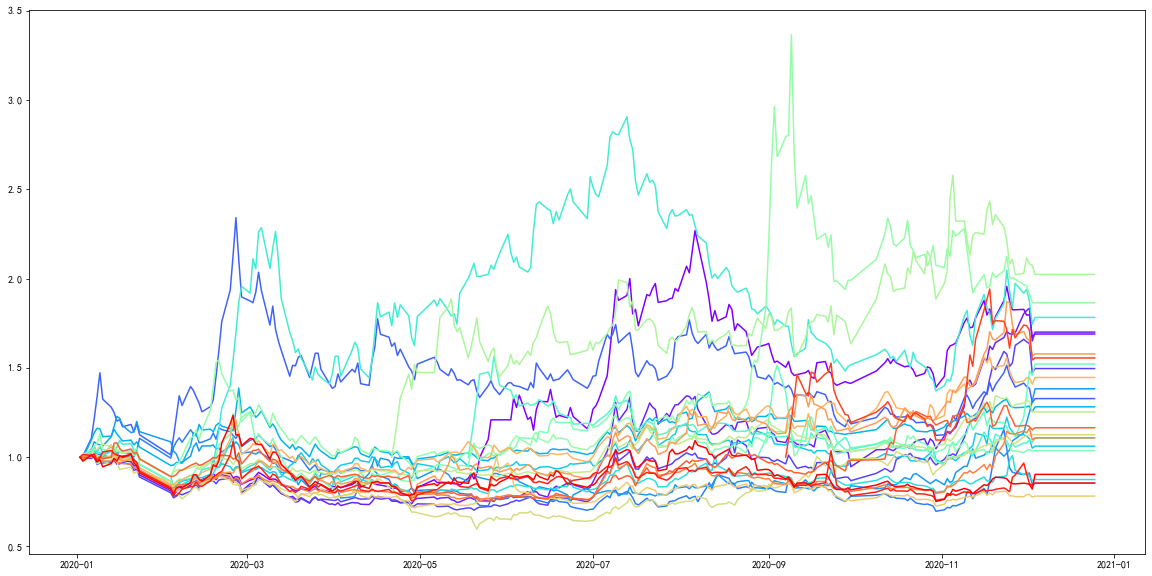

In [6]:
#coding:utf-8
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#有中文出现的情况，需要u'内容'

import numpy as np

x = np.linspace(0, 1, 100)
number = len(stocks)
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, number)]

plt.rcParams['figure.figsize'] = (20.0, 10.0) # 显示大小
for i, stock in enumerate(stocks):
    df=df_dict[stock].dropna()
    plt.plot(df['close']/df['close'][0],color=colors[i],label=stock_name[stock])
    
df_indus = finance.run_query(
    query(finance.SW1_DAILY_PRICE).filter(
        finance.SW1_DAILY_PRICE.code == sw_id,
        finance.SW1_DAILY_PRICE.date >= start_date,
        finance.SW1_DAILY_PRICE.date <= end_date).order_by(
        finance.SW1_DAILY_PRICE.date.desc()).limit(1000))
plt.plot(list(df_dict[stock].T),df_indus['close']/df_indus['close'].values[-1],marker='+', linestyle='--', linewidth=1, markersize=4,label="steel")
plt.legend()

In [10]:
import pandas as pd
stock_return={}
for stock in stocks:
    df=df_dict[stock].dropna()
    stock_return[stock]=(df['close']/df['close'][0]).values[-1]
df_stock=pd.DataFrame({'name':stock_name,
       'return':stock_return})
df_stock.sort_values(by="return",inplace=True,ascending=False)
# print(df_indus["close"].values[0]/df_indus["close"].values[-1])
print(df_stock)


              name    return
300828.XSHE   锐新科技  2.023429
300337.XSHE   银邦股份  1.864198
002824.XSHE   和胜股份  1.782450
000807.XSHE   云铝股份  1.700382
000612.XSHE   焦作万方  1.689655
601388.XSHG   怡球资源  1.578125
601702.XSHG   华峰铝业  1.555556
002996.XSHE   顺博合金  1.521883
000933.XSHE   神火股份  1.496241
600888.XSHG   新疆众和  1.446154
002501.XSHE  *ST利源  1.382857
002160.XSHE   常铝股份  1.327974
002540.XSHE   亚太科技  1.281863
600219.XSHG   南山铝业  1.253394
601677.XSHG   明泰铝业  1.164613
600595.XSHG   ST中孚  1.125541
601600.XSHG   中国铝业  1.108333
002988.XSHE   豪美新材  1.106667
002578.XSHE   闽发铝业  1.061625
300328.XSHE   宜安科技  1.036853
603876.XSHG   鼎胜新材  0.903667
002806.XSHE   华锋股份  0.874822
603115.XSHG   海星股份  0.855680
002379.XSHE   宏创控股  0.854054
600768.XSHG   宁波富邦  0.782061


In [8]:
#print(df_dict["002110.XSHE"])
df_indus

,id,date,code,name,open,high,low,close,volume,money,change_pct
